In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
X_train = (X_train - 0.0) / (255.0 - 0.0)
X_test = (X_test - 0.0) / (255.0 - 0.0)
X_train[0].min(), X_train[0].max()
(0.0, 1.0)


(0.0, 1.0)

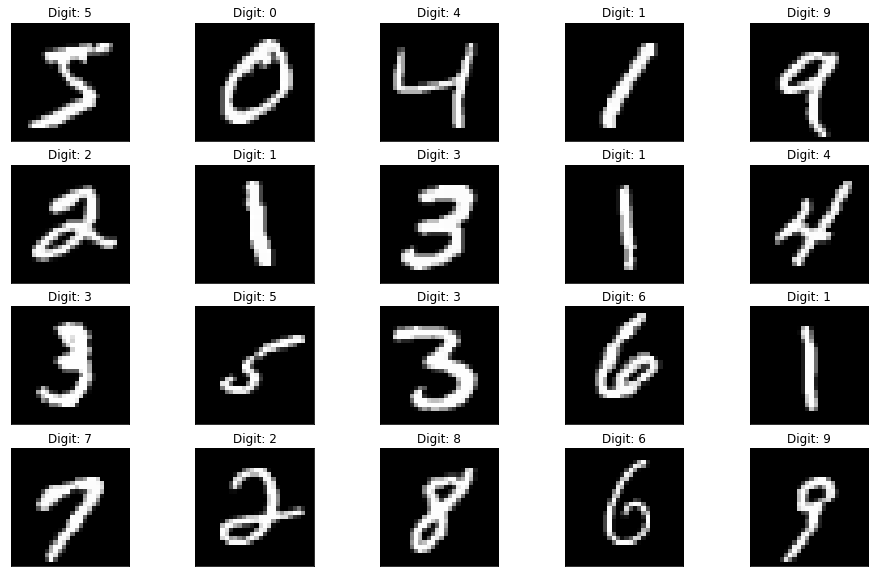

In [4]:
def plot_digit(image, digit, plt, i):
 plt.subplot(4, 5, i + 1)
 plt.imshow(image, cmap=plt.get_cmap('gray'))
 plt.title(f"Digit: {digit}")
 plt.xticks([])
 plt.yticks([])
plt.figure(figsize=(16, 10))
for i in range(20):
 plot_digit(X_train[i], y_train[i], plt, i)
plt.show()


In [5]:
X_train = X_train.reshape((X_train.shape + (1,)))
X_test = X_test.reshape((X_test.shape + (1,)))
y_train[0:20]


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [6]:
model = Sequential([
 Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
 MaxPooling2D((2, 2)),
 Flatten(),
 Dense(100, activation="relu"),
 Dense(10, activation="softmax")
])


In [7]:
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model.compile(
 optimizer=optimizer,
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 100)               540900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
__________________________________________________

In [9]:
model.fit(X_train, y_train, epochs=10, batch_size=32)


Epoch 1/10
1875/1875 [==============================] - 39s 20ms/step - loss: 0.2378 - accuracy: 0.9276
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0788 - accuracy: 0.9762
Epoch 3/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0490 - accuracy: 0.9850
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0345 - accuracy: 0.9895
Epoch 5/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0247 - accuracy: 0.9924
Epoch 6/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0194 - accuracy: 0.9941
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0139 - accuracy: 0.9958
Epoch 8/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0111 - accuracy: 0.9970
Epoch 9/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0076 - accuracy: 0.9979
Epoch 10/10
1875/1875 [==============================] - 38s 20m

1/1 [==============================] - 0s 88ms/step


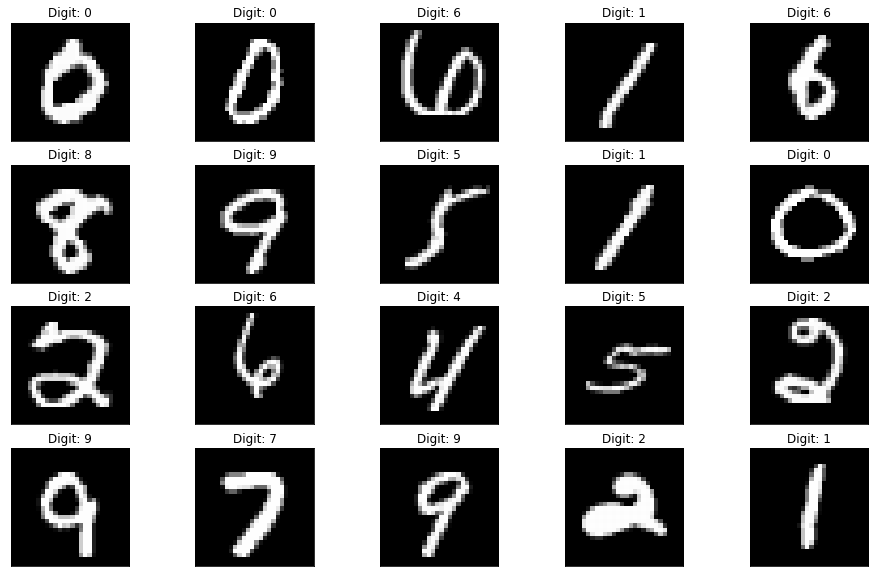

In [10]:
plt.figure(figsize=(16, 10))
for i in range(20):
 image = random.choice(X_test).squeeze()
 digit = np.argmax(model.predict(image.reshape((1, 28, 28, 1)))[0], axis=-1)
 plot_digit(image, digit, plt, i)
plt.show()


In [11]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 0.0296396646054
print('Test accuracy:', score[1]) #Test accuracy: 0.9904


Test loss: 0.03969205915927887
Test accuracy: 0.9869999885559082
